In [2]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [3]:
cd '/gdrive/My Drive/Colab Notebooks/Smartphone project/'

/gdrive/My Drive/Colab Notebooks/Smartphone project


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'lightgrey'})
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
pd.set_option('display.max_rows', None)

In [0]:
def read_csv(path):
    dtypes = pd.read_csv(path, nrows=1).iloc[0].to_dict()
    return pd.read_csv(path, dtype=dtypes, skiprows=[1])

In [43]:
df= read_csv('latest.csv')
data=df.copy()
data.head()

,pid,score-val,name,price,rating,Brand,Processor(GHz),Processor,Core,RAM(GB),Memory(GB),Battery,Screen_size(inches),Display,Memory_card_supported,Android-v,Processor_brand,Front_cam_1,Front_cam_2,Dual Sim,3G,4G,VoLTE,Wi-Fi,IR Blaster,Single Sim,5G,NFC,HDMI,Quad Sim,Triple Sim,Quad_cam,Single_cam,Triple_cam,Dual_cam,Penta_cam
0,pd18nrbx50l,80,Xiaomi Redmi Note 9 Pro Max,16499.0,4.4,Xiaomi,2.3,Snapdragon 720G,Octa Core,6.0,64.0,5020.0,6.67,1080 x 2400 px Display with Punch Hole,512.0,Android v10.0,Snapdragon,32.0,0.0,1,1,1,1,1,1,0,0,0,0,0,0,64,0.0,0,0.0,0
1,pd1avaexqac,76,Xiaomi Redmi Note 9 Pro,13999.0,NaN,Xiaomi,2.3,Snapdragon 720G,Octa Core,4.0,64.0,5020.0,6.67,1080 x 2400 px Display with Punch Hole,512.0,Android v10.0,Snapdragon,16.0,0.0,1,1,1,1,1,1,0,0,0,0,0,0,48,0.0,0,0.0,0
2,pd1xq857m1x,74,Realme Narzo 10,11999.0,3.7,Realme,2.0,Helio G80,Octa Core,4.0,128.0,5000.0,6.50,720 x 1600 px Display with Water Drop Notch,256.0,Android v10,Helio,16.0,0.0,1,1,1,1,1,0,0,0,0,0,0,0,48,0.0,0,0.0,0
3,pd1sbe530da,80,Samsung Galaxy M31,15999.0,4.4,Samsung,2.3,Exynos 9611,Octa Core,6.0,64.0,6000.0,6.40,1080 x 2340 px Display with Water Drop Notch,512.0,Android v10.0,Exynos,32.0,0.0,1,1,1,1,1,0,0,0,0,0,0,0,64,0.0,0,0.0,0
4,pd1dj4jnzb4,76,Samsung Galaxy M21,12699.0,4.4,Samsung,2.3,Exynos 9611,Octa Core,4.0,64.0,6000.0,6.40,1080 x 2340 px Display with Water Drop Notch,512.0,Android v10.0,Exynos,20.0,0.0,1,1,1,1,1,0,0,0,0,0,0,0,0,0.0,48,0.0,0


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pid                    2000 non-null   object 
 1   score-val              2000 non-null   int64  
 2   name                   2000 non-null   object 
 3   price                  2000 non-null   float64
 4   rating                 1675 non-null   float64
 5   Brand                  2000 non-null   object 
 6   Processor(GHz)         1532 non-null   float64
 7   Processor              1536 non-null   object 
 8   Core                   1536 non-null   object 
 9   RAM(GB)                1836 non-null   float64
 10  Memory(GB)             1897 non-null   float64
 11  Battery                1895 non-null   float64
 12  Screen_size(inches)    1906 non-null   float64
 13  Display                1906 non-null   object 
 14  Memory_card_supported  1308 non-null   float64
 15  Andr

In [45]:
data.describe()

,score-val,price,rating,Processor(GHz),RAM(GB),Memory(GB),Battery,Screen_size(inches),Memory_card_supported,Front_cam_1,Front_cam_2,Quad_cam,Single_cam,Triple_cam,Dual_cam,Penta_cam
count,2000.00000,2000.000000,1675.000000,1532.000000,1836.000000,1897.000000,1895.000000,1906.000000,1308.000000,1648.000000,1646.000000,2000.000000,1986.000000,2000.0000,2000.00000,2000.000000
mean,58.70850,20135.644000,4.324925,2.124256,7.066993,86.525040,3442.766755,5.534334,228.604740,13.474775,0.310207,7.013500,4.291017,5.4605,4.74080,0.277000
std,23.15525,31973.682638,0.278261,0.460254,9.586229,86.894411,1282.020863,1.493212,162.940272,8.735963,1.483565,18.910556,7.927810,14.2405,9.81838,5.080372
min,6.00000,99.000000,0.500000,1.000000,1.000000,1.000000,1.000000,0.300000,1.000000,0.070000,0.000000,0.000000,0.000000,0.0000,0.00000,0.000000
25%,50.00000,5999.000000,4.150000,1.800000,3.000000,32.000000,3000.000000,5.450000,128.000000,8.000000,0.000000,0.000000,0.000000,0.0000,0.00000,0.000000
50%,64.00000,11994.500000,4.350000,2.100000,4.000000,64.000000,3520.000000,6.180000,256.000000,12.000000,0.000000,0.000000,0.000000,0.0000,0.00000,0.000000
75%,76.00000,24943.000000,4.500000,2.400000,6.000000,128.000000,4030.000000,6.400000,256.000000,16.000000,0.000000,0.000000,8.000000,0.0000,12.00000,0.000000
max,96.00000,650000.000000,5.000000,2.960000,64.000000,720.000000,18000.000000,8.000000,512.000000,44.000000,20.000000,108.000000,108.000000,108.0000,64.00000,108.000000


In [0]:
features=[feature for feature in data.columns ]

In [47]:
for feature in features:
  percentage=data[feature].isnull().sum()/len(data[feature])
  print("percentgae of Null values in {}  =  {}% ".format(feature,percentage*100)) 

percentgae of Null values in pid  =  0.0% 
percentgae of Null values in score-val  =  0.0% 
percentgae of Null values in name  =  0.0% 
percentgae of Null values in price  =  0.0% 
percentgae of Null values in rating  =  16.25% 
percentgae of Null values in Brand  =  0.0% 
percentgae of Null values in Processor(GHz)  =  23.400000000000002% 
percentgae of Null values in Processor  =  23.200000000000003% 
percentgae of Null values in Core  =  23.200000000000003% 
percentgae of Null values in RAM(GB)  =  8.200000000000001% 
percentgae of Null values in Memory(GB)  =  5.1499999999999995% 
percentgae of Null values in Battery  =  5.25% 
percentgae of Null values in Screen_size(inches)  =  4.7% 
percentgae of Null values in Display  =  4.7% 
percentgae of Null values in Memory_card_supported  =  34.599999999999994% 
percentgae of Null values in Android-v  =  19.400000000000002% 
percentgae of Null values in Processor_brand  =  23.200000000000003% 
percentgae of Null values in Front_cam_1  = 

In [48]:
numeric_feature = [feature for feature in features if data[feature].dtypes!='O']
numeric_feature

['score-val',
 'price',
 'rating',
 'Processor(GHz)',
 'RAM(GB)',
 'Memory(GB)',
 'Battery',
 'Screen_size(inches)',
 'Memory_card_supported',
 'Front_cam_1',
 'Front_cam_2',
 'Quad_cam',
 'Single_cam',
 'Triple_cam',
 'Dual_cam',
 'Penta_cam']

In [0]:
cam = ['Single_cam','Quad_cam','Triple_cam','Dual_cam', 'Penta_cam','Front_cam_2','Front_cam_1']
new_numeric_features = list(set(numeric_feature)-set(cam))


In [50]:
new_numeric_features

['price',
 'Processor(GHz)',
 'Screen_size(inches)',
 'score-val',
 'rating',
 'Memory_card_supported',
 'RAM(GB)',
 'Memory(GB)',
 'Battery']

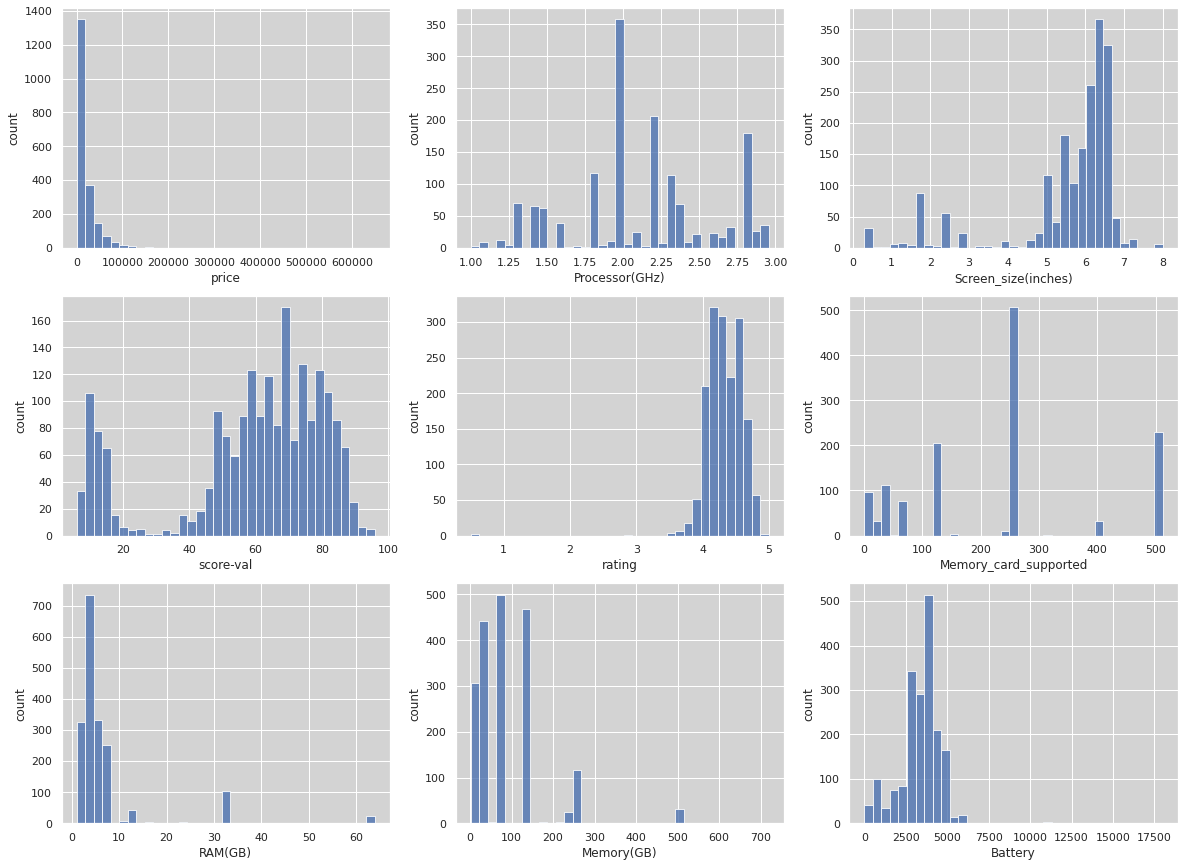

In [51]:
plt.figure(figsize=(20,15))
for i,feature in enumerate(new_numeric_features):
  plt.subplot(3,3,i+1)
  data[feature].hist(bins=35 , alpha=0.8)
  #plt.title(feature)
  plt.xlabel(feature)
  plt.ylabel('count')

plt.show()

**As we can see most of the feature are not normally distributed , one of them is price lets deal with these features**

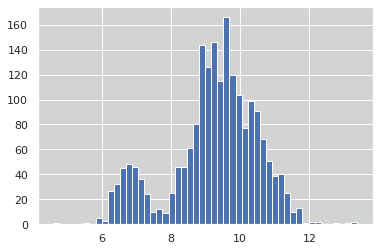

In [52]:
data['price']=np.log(data['price'])
data['price'].hist(bins=50)
plt.show()

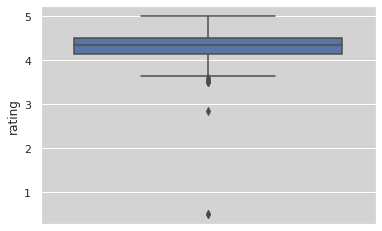

In [53]:
sns.boxplot(y='rating', data=data)
plt.show()

**As there very few rating below 3 , we can consider them as outliers because this possible these product are pretty old and removing them gives us close to normal distribution**

In [54]:
data['rating'][df['rating']<3]

1574    0.50
1795    0.50
1927    2.85
Name: rating, dtype: float64

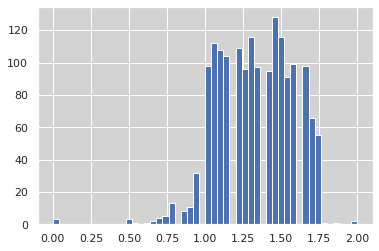

In [55]:
data['rating']=data['rating']-3
data['rating']=data['rating'].apply(lambda x:0 if x<0 else x)
data['rating'].hist(bins=50)
plt.show()

**It still not normally distibuted but we can work with it**

In [56]:
data['Battery'][df['Battery']>6000]

214      6100.0
454     18000.0
618      6150.0
920     13000.0
1322    11000.0
1327     9000.0
1328    11000.0
1329    12000.0
1791    10000.0
1822     6350.0
Name: Battery, dtype: float64

**As there are significant number of values more than 6000 these may be a considerable observation so we dont want to remove them**

In [57]:
len(data['Battery'][df['Battery']<500])

39

**These are some observation as battery cannot be have tha low values It may be possible these are not handled well during data cleaning**

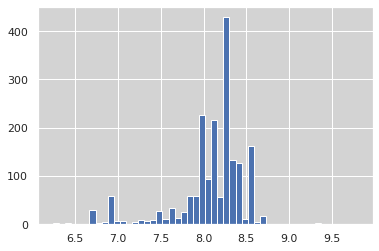

In [58]:
data['Battery']=data['Battery'].apply(lambda x:np.nan if x<500 else x )
data['Battery']=np.log(data['Battery'])
data['Battery'].hist(bins=50)
plt.show()

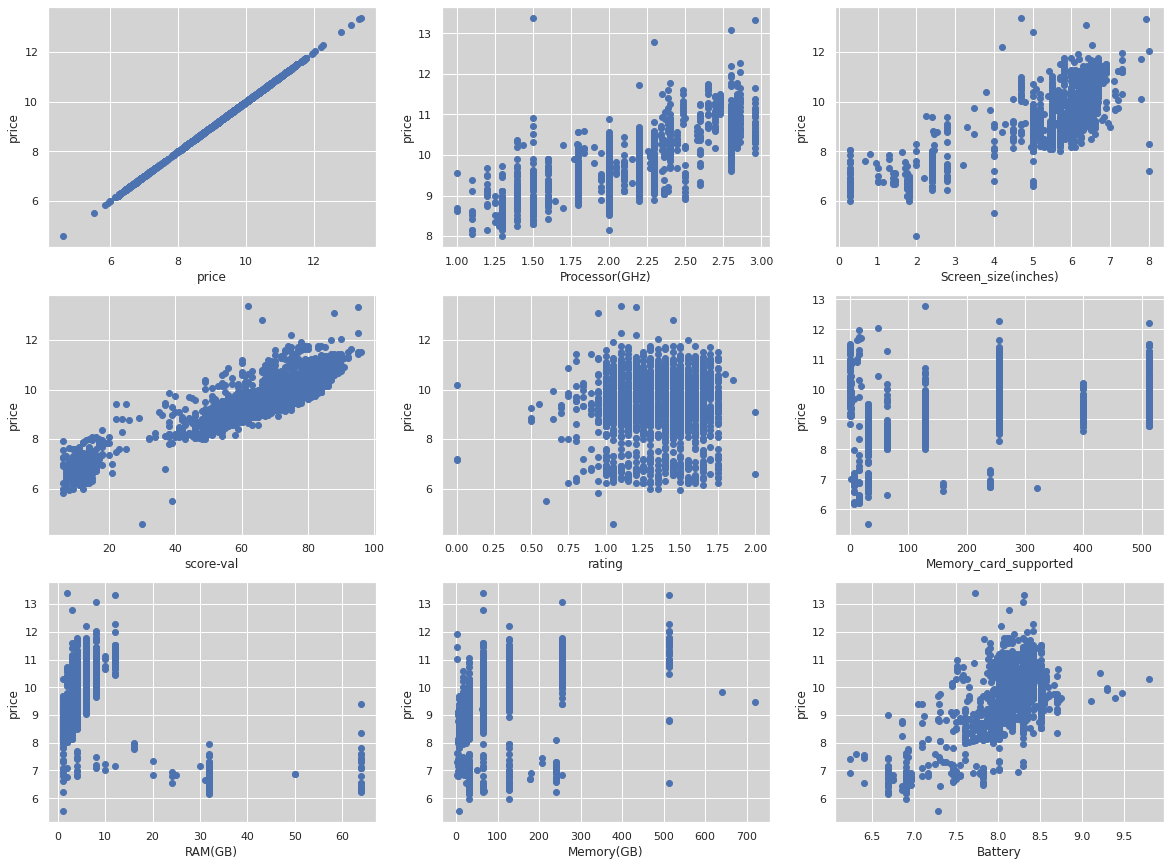

In [59]:
plt.figure(figsize=(20,15))
for i,feature in enumerate(new_numeric_features):
  plt.subplot(3,3,i+1)
  plt.scatter(x=data[feature] , y=data['price'])
  #plt.title(feature)
  plt.xlabel(feature)
  plt.ylabel('price')

plt.show()

**As most of the factors such as Score-val(something like critic rating),Battery,RAM,Screen_size,Processor are have positive correlation with price** 

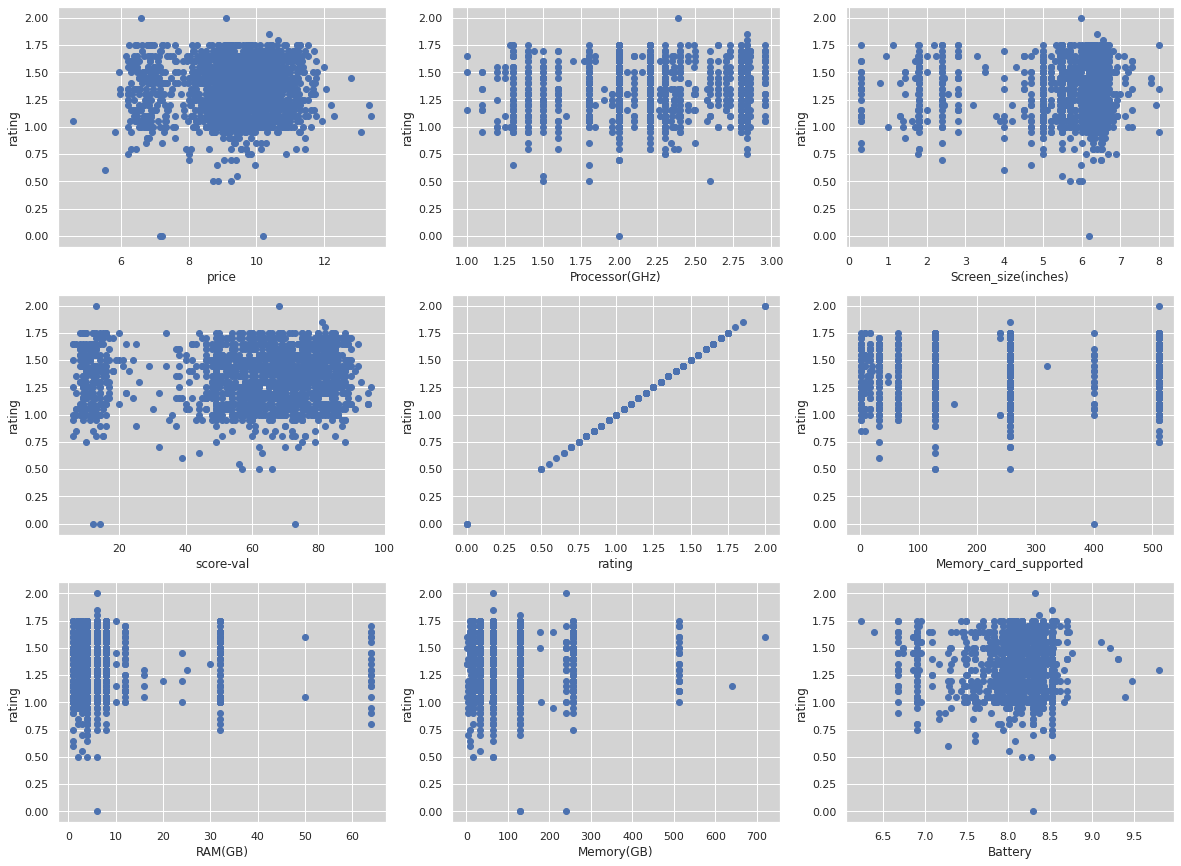

In [60]:
plt.figure(figsize=(20,15))
for i,feature in enumerate(new_numeric_features):
  plt.subplot(3,3,i+1)
  plt.scatter(x=data[feature] , y=data['rating'])
  #plt.title(feature)
  plt.xlabel(feature)
  plt.ylabel('rating')

plt.show()

**As expected the getting correlation between 'rating' and other feature is much difficult to visualize as compared to price and other features.**

**So lets try to visualize in a different way.**

In [61]:
values=[]
indexing=[]
for i in range(4,14):
  value=data['rating'][(data['price']<i+1) & (data['price']>=i)].mean()
  print('mean value of rating for the log price : b/w {} and {} = {}'.format(i,i+1,value))
  values.append(value)
  indexing.append(i)

mean value of rating for the log price : b/w 4 and 5 = 1.0499999999999998
mean value of rating for the log price : b/w 5 and 6 = 1.1400000000000001
mean value of rating for the log price : b/w 6 and 7 = 1.3289473684210524
mean value of rating for the log price : b/w 7 and 8 = 1.3107954545454545
mean value of rating for the log price : b/w 8 and 9 = 1.3259677419354832
mean value of rating for the log price : b/w 9 and 10 = 1.3069558101472991
mean value of rating for the log price : b/w 10 and 11 = 1.3600253807106601
mean value of rating for the log price : b/w 11 and 12 = 1.3691588785046724
mean value of rating for the log price : b/w 12 and 13 = 1.275
mean value of rating for the log price : b/w 13 and 14 = 1.0833333333333333


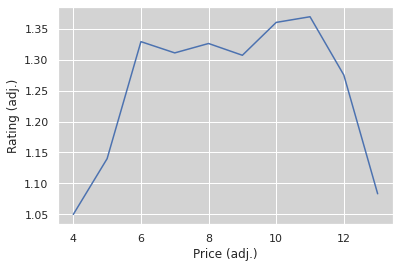

In [62]:
plt.plot(indexing,values)
plt.xlabel('Price (adj.)')
plt.ylabel('Rating (adj.)')
plt.show()

**Plotting Camera quality against price as it is discrete numerical feature**

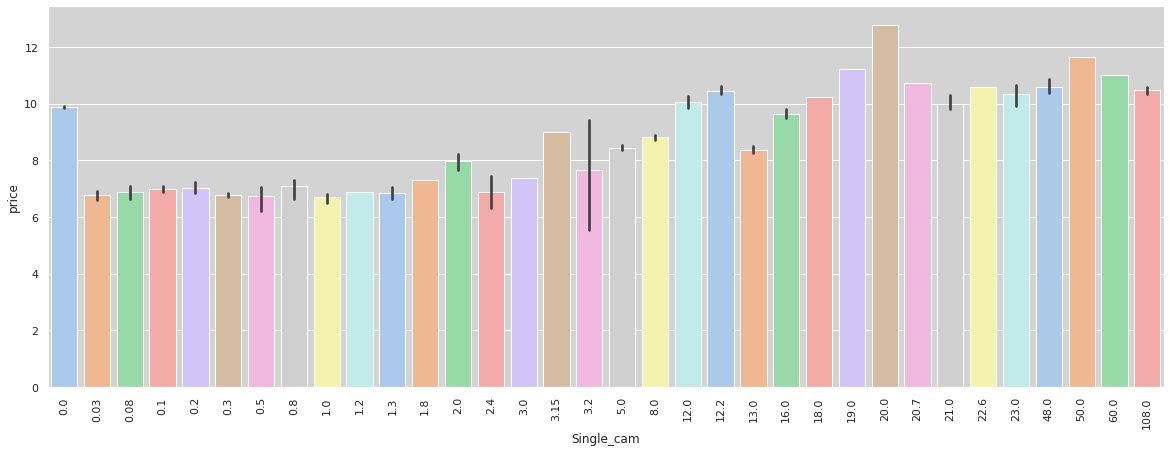

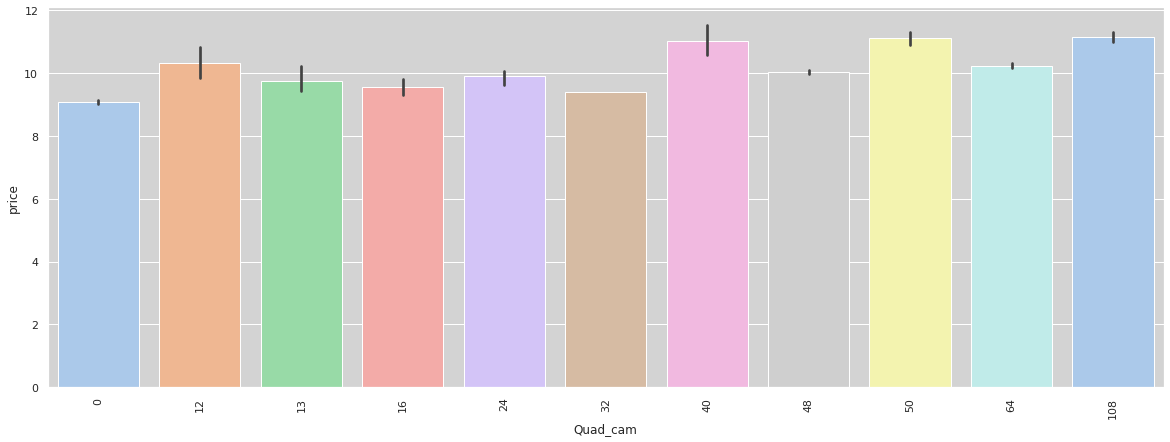

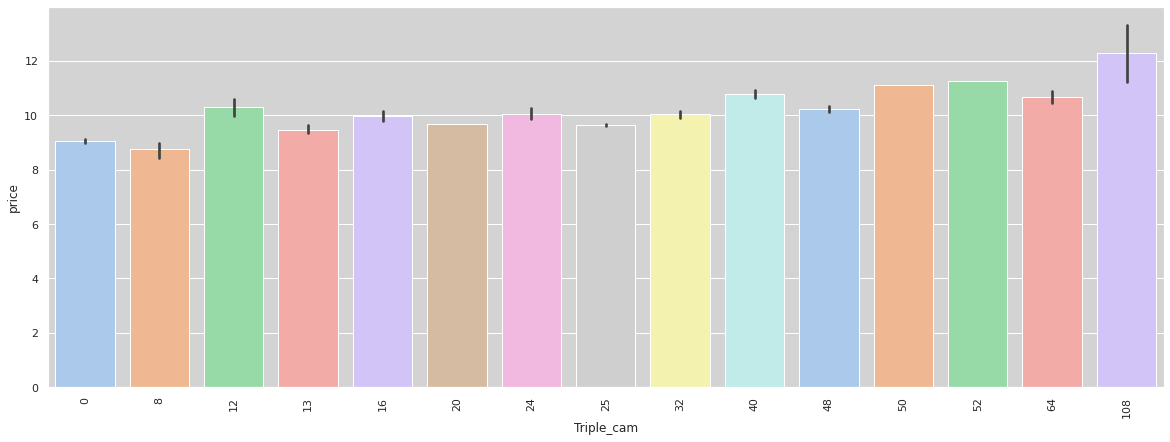

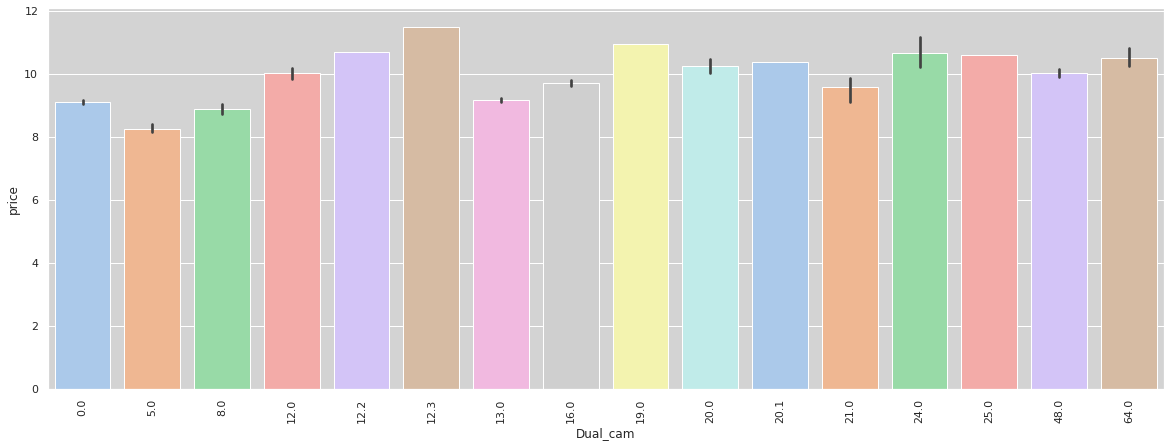

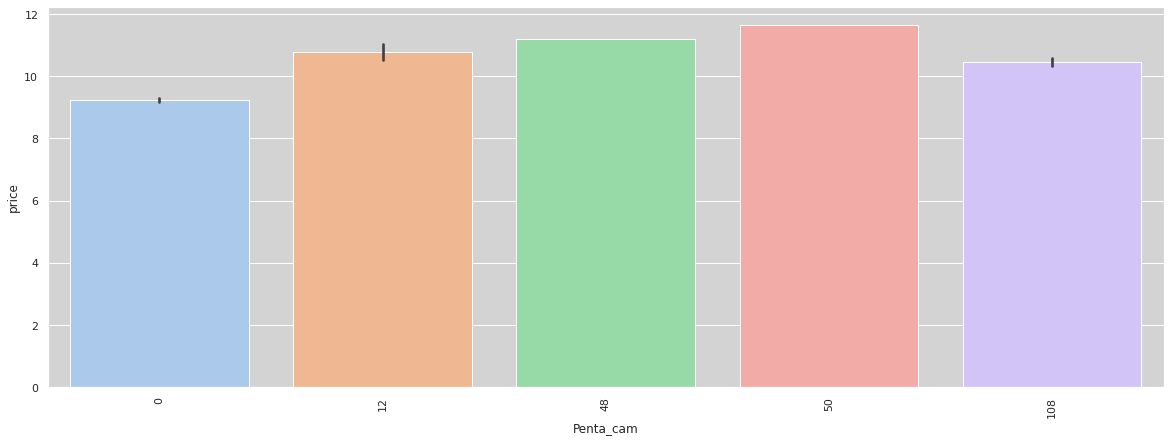

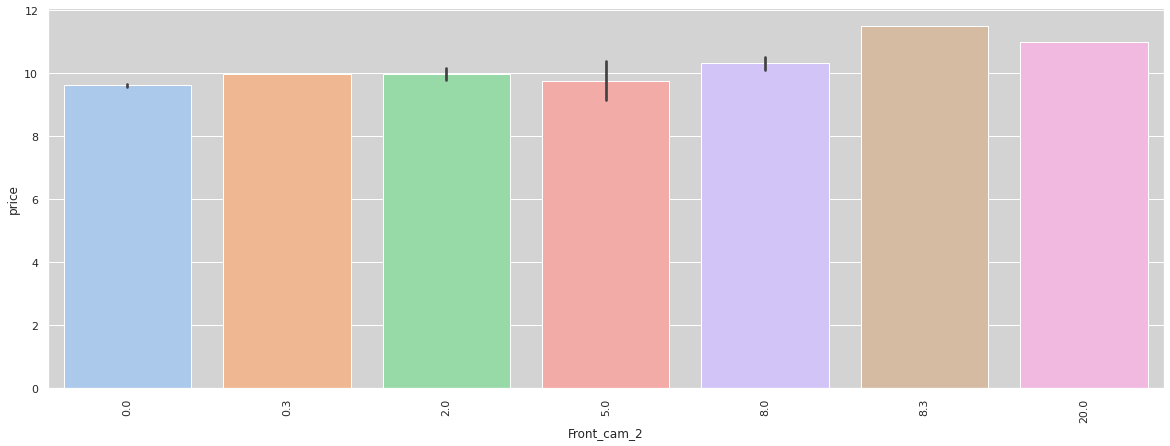

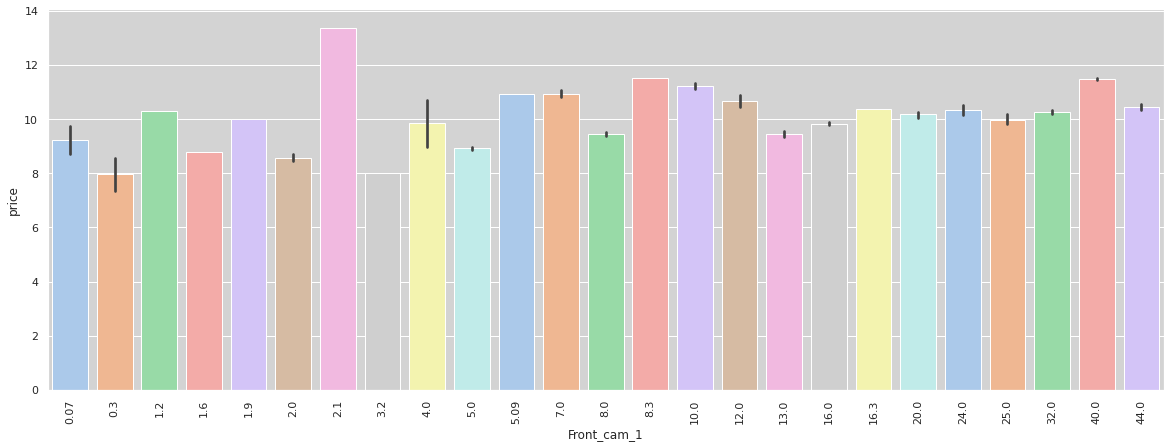

In [63]:
for i,feature in enumerate(cam):
  plt.figure(figsize=(20,7))
  sns.barplot(x=data[feature] ,y=data['price'] ,palette='pastel' )
  #plt.title(feature)
  plt.xlabel(feature)
  plt.ylabel('price')
  plt.xticks(rotation=90)
  plt.show()

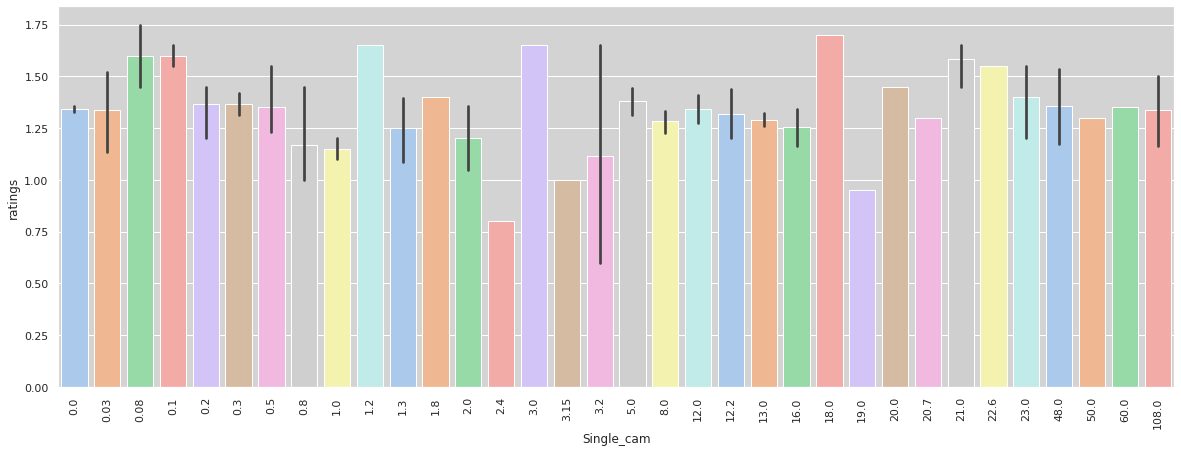

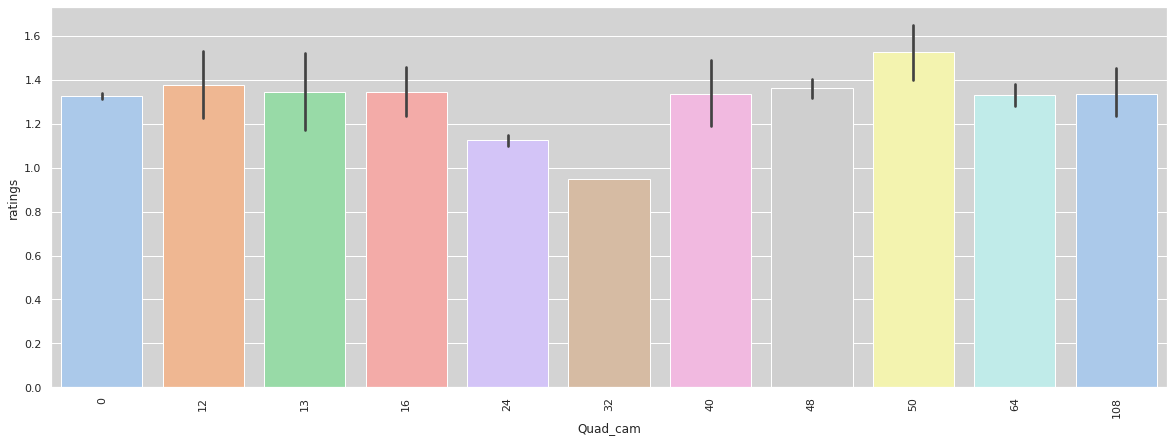

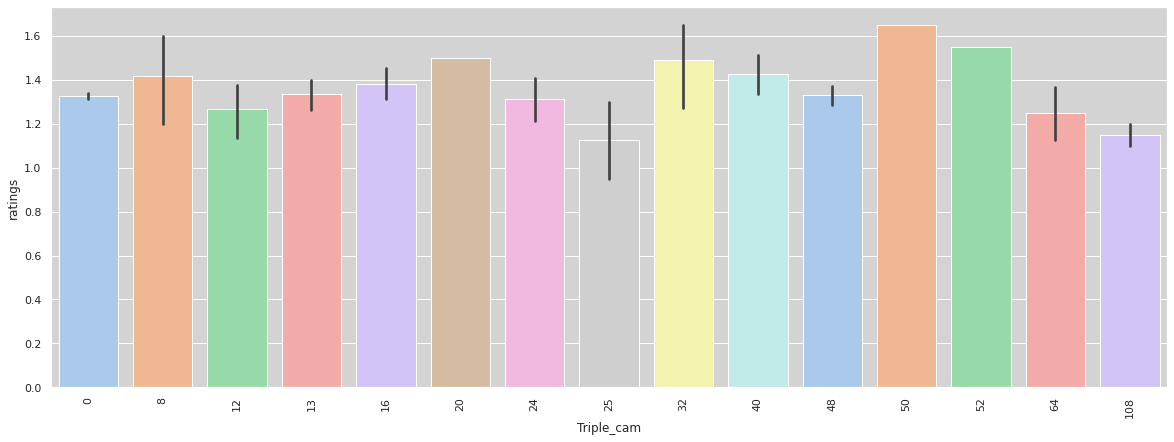

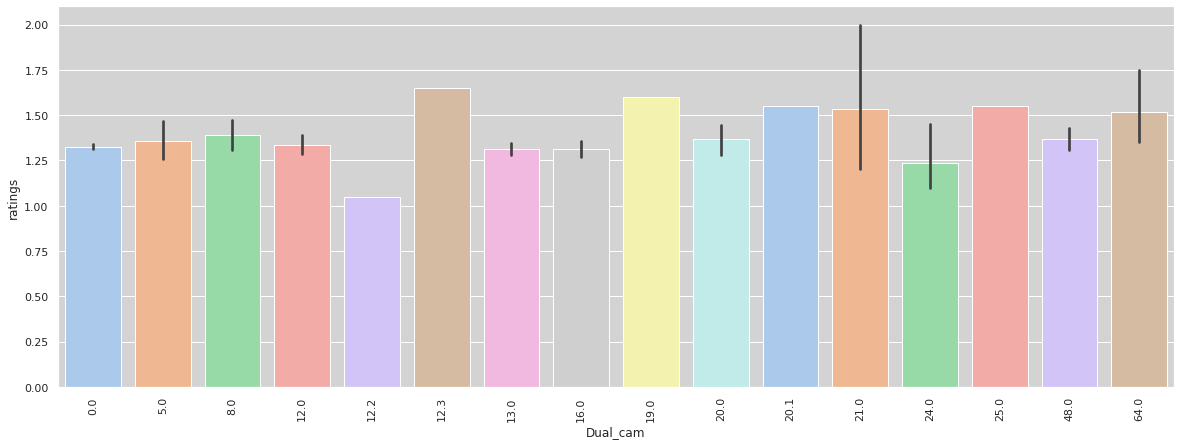

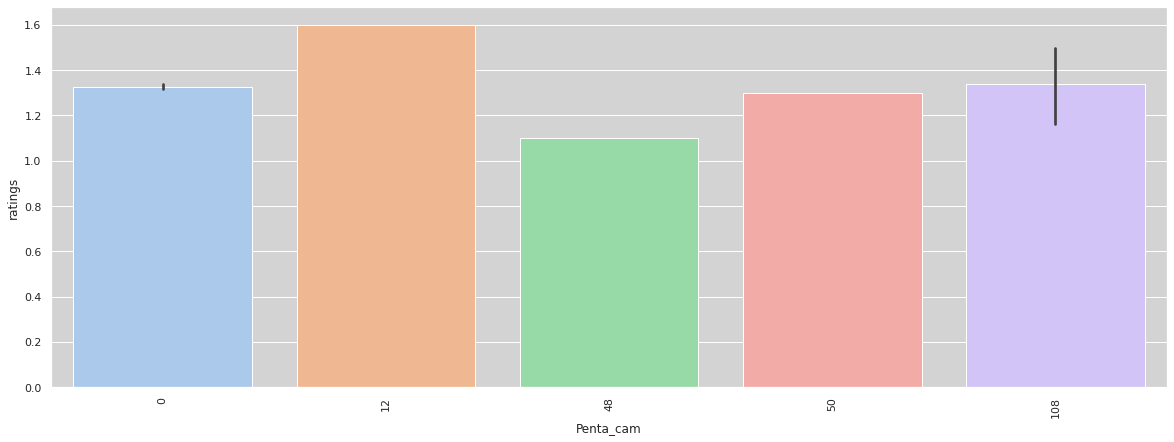

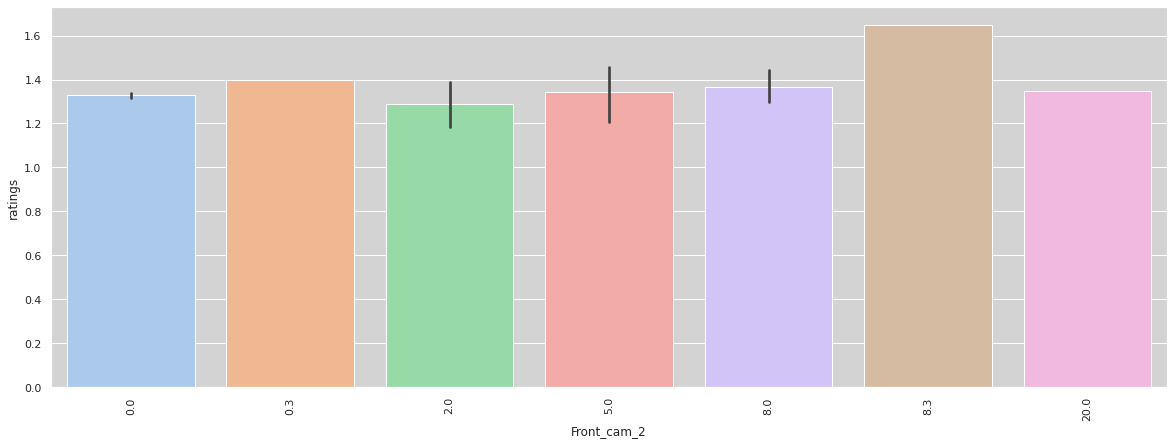

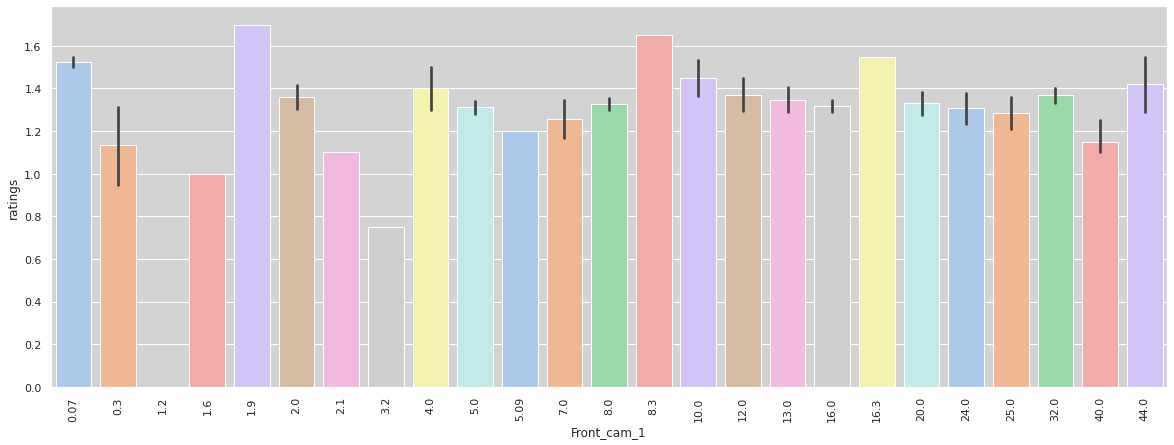

In [64]:
for i,feature in enumerate(cam):
  plt.figure(figsize=(20,7))
  sns.barplot(x=data[feature] ,y=data['rating'] ,palette='pastel' )
  #plt.title(feature)
  plt.xlabel(feature)
  plt.ylabel('ratings')
  plt.xticks(rotation=90)
  plt.show()

***Too costly and cheap product have bad consumer reaction***

**Lets, hope the model able to observe other features as well in similar fashion.**

**Lets, work with some categorical variables.**

In [0]:
categorical_features =[feature for feature in features if data[feature].dtypes=='O']
categorical_features = list(set(categorical_features)-set(['pid','name']))
new_categorical_features=list(set(categorical_features)-set(['Processor','Display'])) 


In [66]:
new_categorical_features

['4G',
 'HDMI',
 'Wi-Fi',
 'Processor_brand',
 'Dual Sim',
 'Core',
 'Brand',
 'IR Blaster',
 'Android-v',
 '3G',
 'Triple Sim',
 'Single Sim',
 '5G',
 'Quad Sim',
 'NFC',
 'VoLTE']

In [0]:
non_binary_category_categorical_features=['Processor_brand','Android-v','Brand','Core']
binary_category_categorical_features=list(set(new_categorical_features)-set(['Processor_brand','Brand','Android-v','Core']))


In [68]:
pd.pivot_table(data, index=['Single Sim','Dual Sim','Triple Sim','Quad Sim'],values=['price','rating'])

price    rating
Single Sim Dual Sim Triple Sim Quad Sim                    
0          0        0          0         8.611713  1.450000
                               1         8.655052  1.375000
                    1          0         7.438437  1.387500
           1        0          0         9.224488  1.328078
1          0        0          0         9.678016  1.318667

**Rating of unknown sim is higher so i definelty missed some important data during data cleaning.Lets see it with plot.**

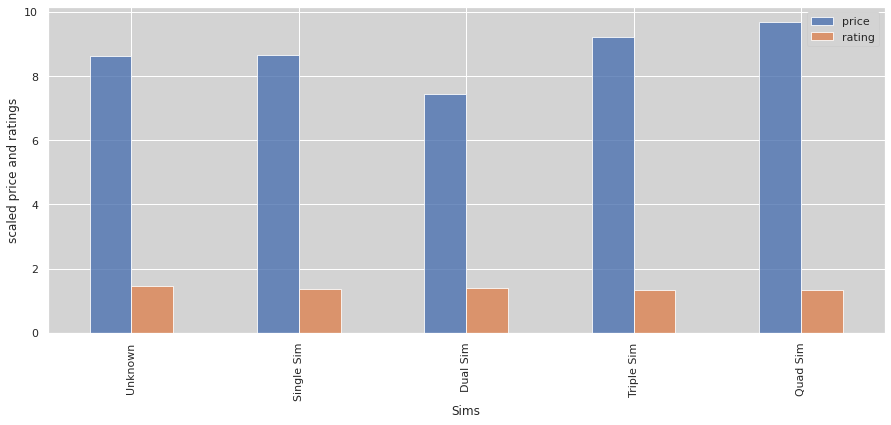

In [69]:
fig, ax = plt.subplots(figsize=(15, 6))
pd.pivot_table(data, index=['Single Sim','Dual Sim','Triple Sim','Quad Sim'],values=['price','rating']).plot.bar(ax=ax, legend=True ,alpha=0.8)
plt.gca().set_xticklabels(['Unknown','Single Sim','Dual Sim','Triple Sim','Quad Sim'])
plt.ylabel('scaled price and ratings')
plt.xlabel('Sims')
plt.show()

**Aas expected the rating and price values is higher for Quard sim**

In [70]:
pd.pivot_table(data, index=['3G','4G','5G'],values=['price','rating'])

price    rating
3G 4G 5G                     
0  0  0    6.895376  1.320000
   1  0    8.098643  1.500000
1  0  0    8.254204  1.308140
   1  0    9.568606  1.325383
      1   10.706255  1.364968

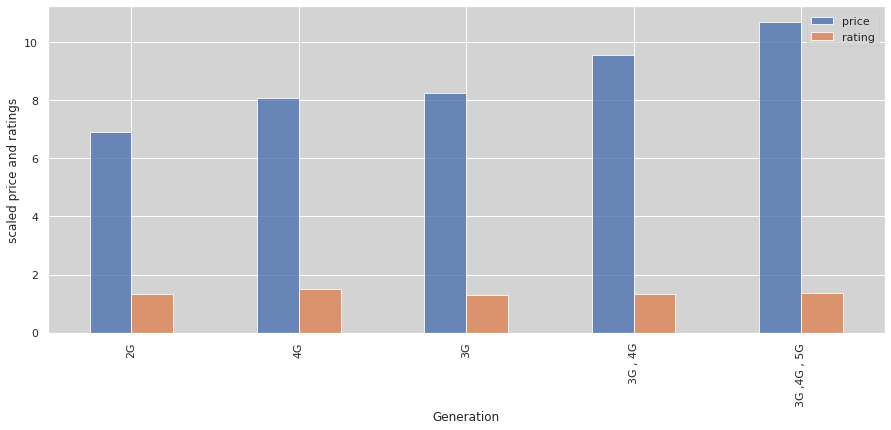

In [71]:
fig, ax = plt.subplots(figsize=(15, 6))
pd.pivot_table(data, index=['3G','4G','5G'],values=['price','rating'], aggfunc='mean').plot.bar(ax=ax, legend=True ,alpha=0.8)
plt.gca().set_xticklabels(['2G', '4G', '3G', '3G , 4G', '3G ,4G , 5G'])
plt.ylabel('scaled price and ratings')
plt.xlabel('Generation')
plt.show()

**As it is clearly visible as a smartphone with combination all genration is more valuable as well as its user rating is also better as compared to others.**

In [72]:
pd.pivot_table(data, index=['HDMI','NFC','VoLTE','Wi-Fi'],values=['price','rating'])

price    rating
HDMI NFC VoLTE Wi-Fi                     
0    0   0     0       6.886127  1.324583
               1       9.026935  1.313462
         1     0       8.027878  1.450000
               1       9.357022  1.321570
     1   0     1      10.273583  1.374359
         1     1      10.470951  1.344799
1    0   0     1      10.102338  1.150000
     1   0     1       9.472222  1.187500
         1     1      10.720905  1.200000

**VoLTE is results in better user expirence.**

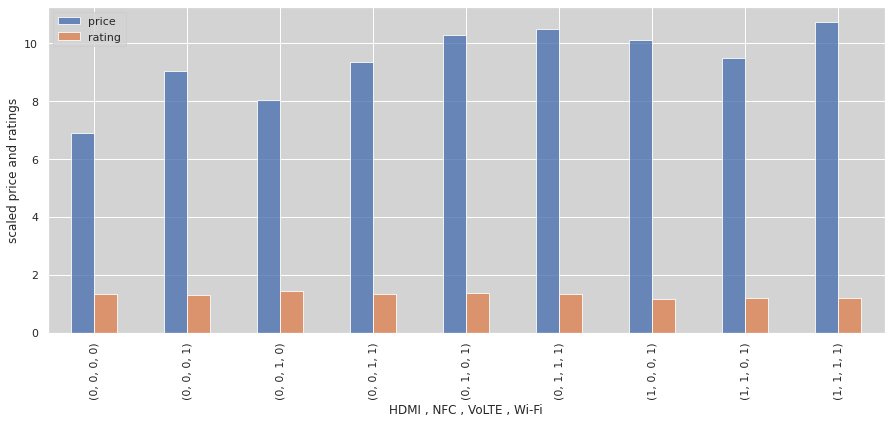

In [73]:
fig, ax = plt.subplots(figsize=(15, 6))
pd.pivot_table(data, index=['HDMI','NFC','VoLTE','Wi-Fi'],values=['price','rating'], aggfunc='mean').plot.bar(ax=ax,alpha=0.8)
plt.ylabel('scaled price and ratings')
plt.xlabel('HDMI , NFC , VoLTE , Wi-Fi')
plt.show()

**It is clearly visible wherever VoLTE is present there is a positive change noted.**

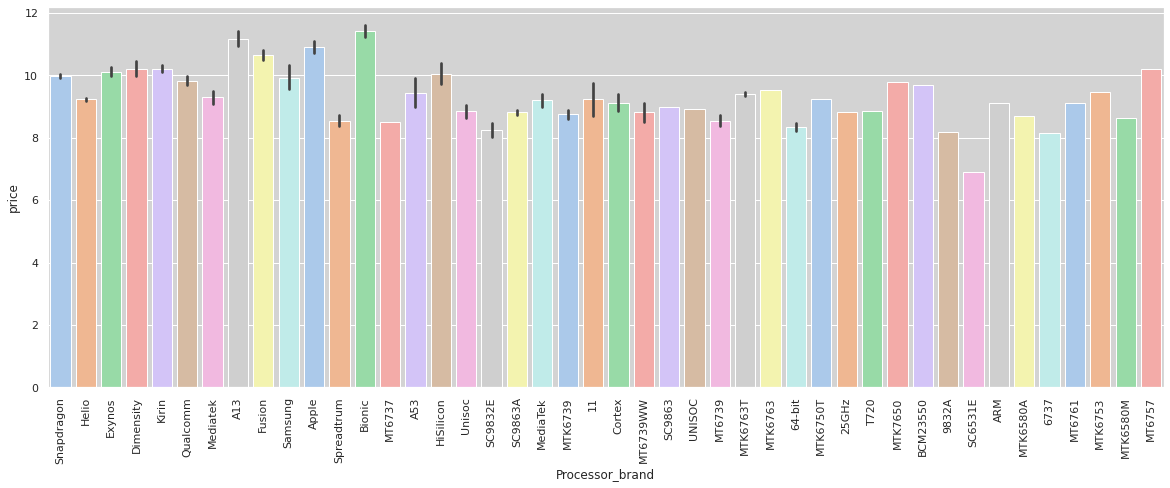

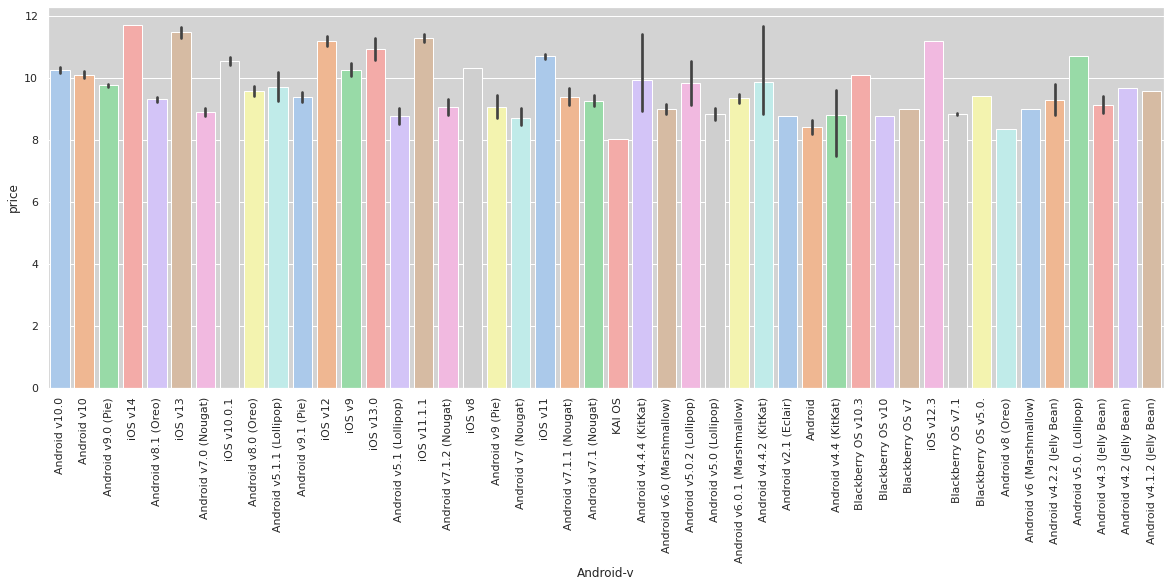

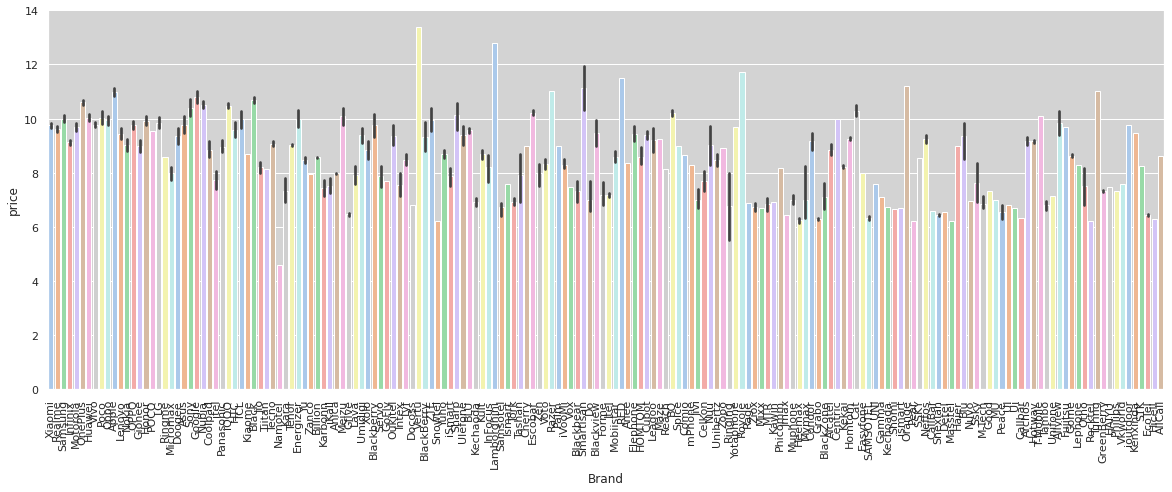

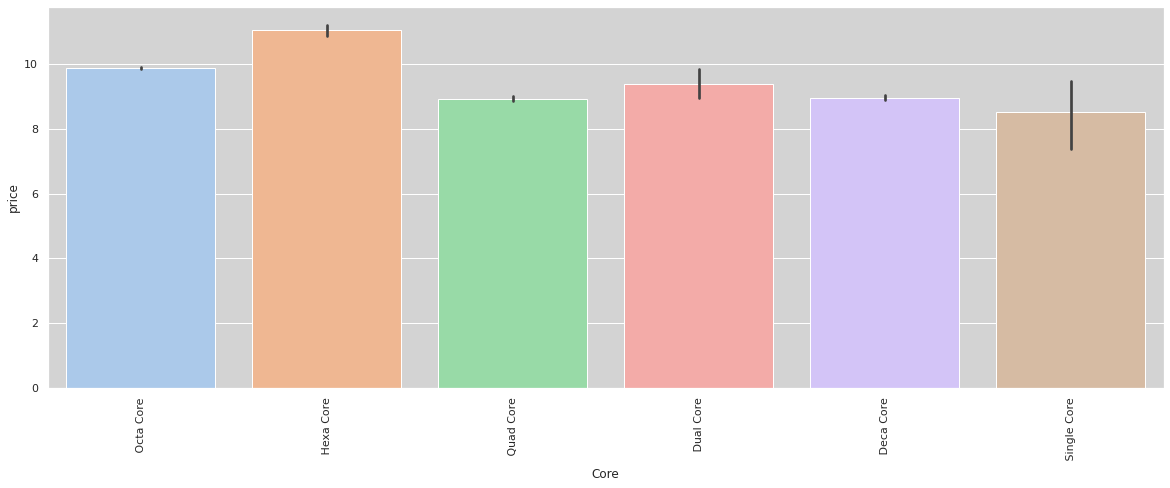

In [74]:

for i,feature in enumerate(non_binary_category_categorical_features):
  plt.figure(figsize=(20,7))
  sns.barplot(x=data[feature] ,y=data['price'] ,palette='pastel' )
  #plt.title(feature)
  plt.xlabel(feature)
  plt.ylabel('price')
  plt.xticks(rotation=90)
  plt.show()


**1. Bionic,A13 and Apple process are most expensive ones.**<br>
**2. As expected Smartphone with Ios are most expensive ones which explain the fact the apple product are the most expensive , other than the KAI OS is the cheapest one.**<br>
**3. Hexa core processor are expensive one and single cores the cheapest one as expected.**<br>

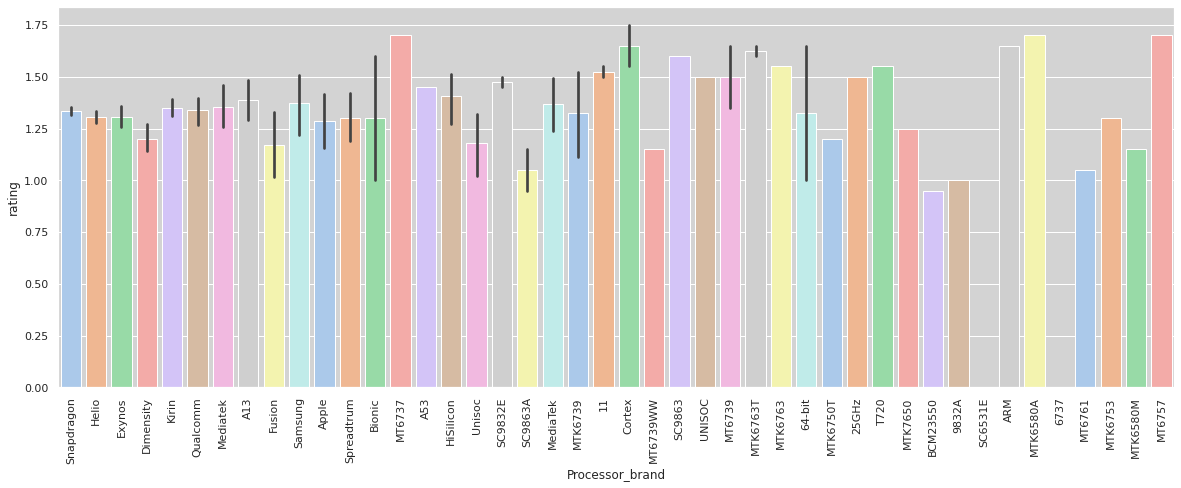

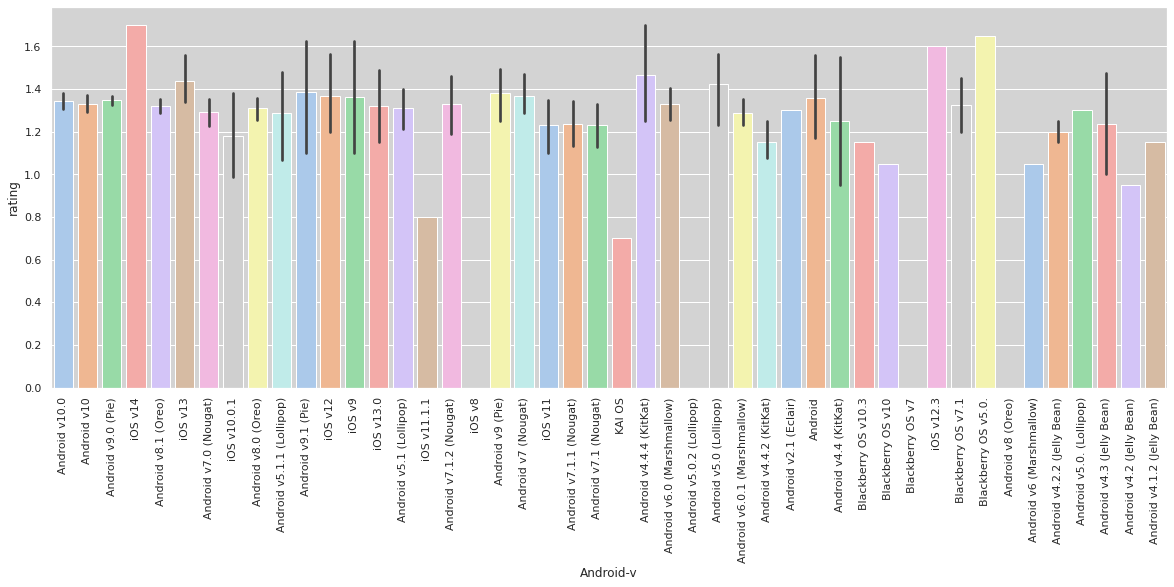

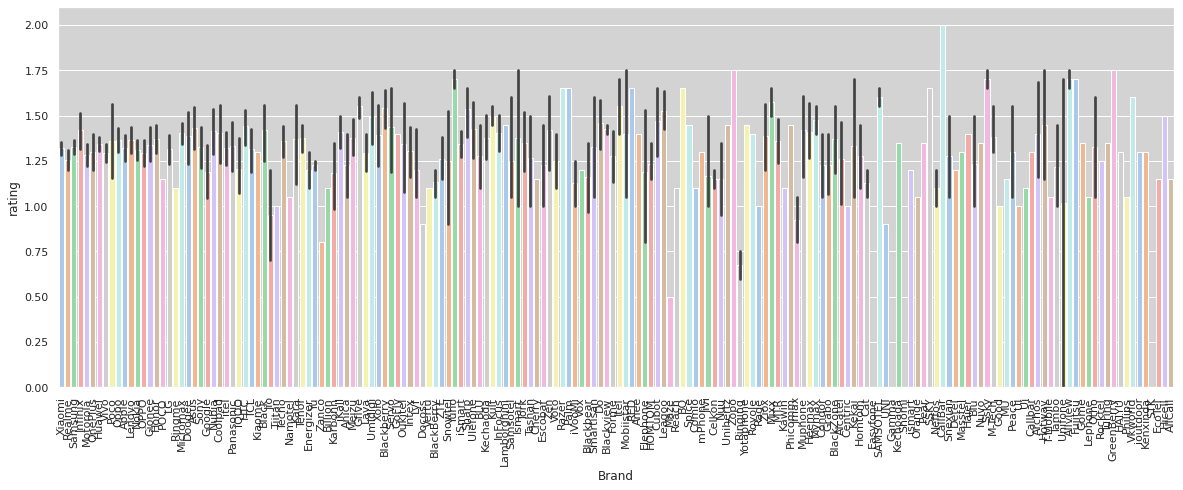

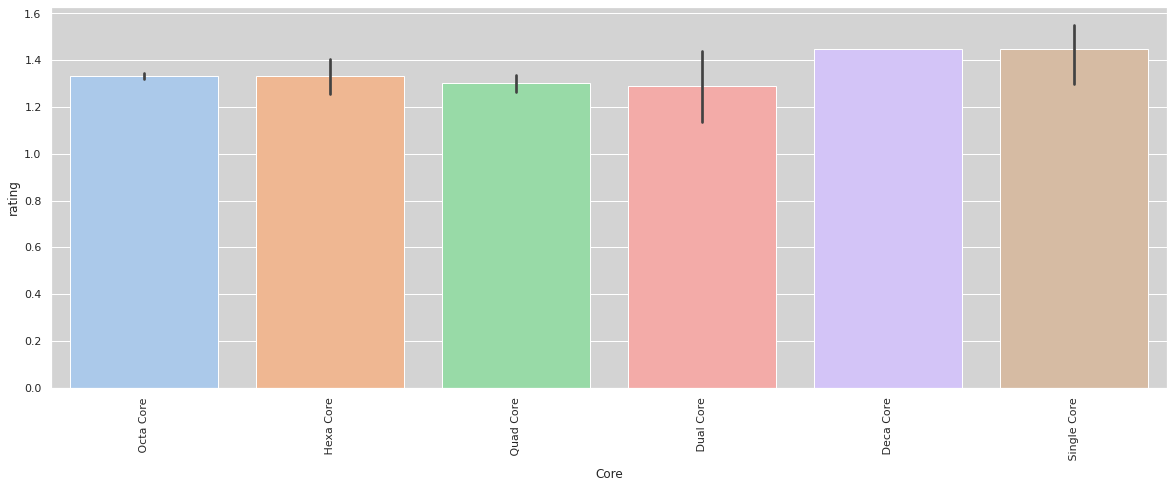

In [76]:
for i,feature in enumerate(non_binary_category_categorical_features):
  plt.figure(figsize=(20,7))
  sns.barplot(x=data[feature] ,y=data['rating'] ,palette='pastel' )
  #plt.title(feature)
  plt.xlabel(feature)
  plt.ylabel('rating')
  plt.xticks(rotation=90)
  plt.show()

**An interesting Fact comes into picture the despite of the fact that Bionic ,Apple are most expensive process but still MT6737,MT6757,cortex are most preferable by user which also the fact why most expensive phones are not rated as good as some middle tier phone brand.**   

**Another insterseting comes out that the Processor Brand IOS-14 is the most positively rated despite the fact of that the overall IOS is not doing great within users.**

**Blackberry only OS v5 is 2nd highest rated OS.Other than that no Balckberry OS have good ratings as matter of fact Blackberry v10 is one of the worst rated version.**

In [0]:
data.to_csv('modify.csv')